In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 한글 글꼴 설정
plt.rcParams['font.family'] ='NanumGothic'
plt.rcParams['axes.unicode_minus'] =False

In [3]:
# 데이터 로드
sales_data = pd.read_csv('./csv/sales.csv')
brand_keyword_data = pd.read_csv('./csv/brand_keyword_cnt.csv')
product_info = pd.read_csv('./csv/product_info.csv')
train_data = pd.read_csv('./csv/train.csv')

sales_data.head(), brand_keyword_data.head(), product_info.head(), train_data.head()

(   ID                제품             대분류             중분류             소분류  \
 0   0  B002-00001-00001  B002-C001-0002  B002-C002-0007  B002-C003-0038   
 1   1  B002-00002-00001  B002-C001-0003  B002-C002-0008  B002-C003-0044   
 2   2  B002-00002-00002  B002-C001-0003  B002-C002-0008  B002-C003-0044   
 3   3  B002-00002-00003  B002-C001-0003  B002-C002-0008  B002-C003-0044   
 4   4  B002-00003-00001  B002-C001-0001  B002-C002-0001  B002-C003-0003   
 
           브랜드  2022-01-01  2022-01-02  2022-01-03  2022-01-04  ...  \
 0  B002-00001           0           0           0           0  ...   
 1  B002-00002           0           0           0           0  ...   
 2  B002-00002           0           0           0           0  ...   
 3  B002-00002           0           0           0           0  ...   
 4  B002-00003           0           0           0           0  ...   
 
    2023-03-26  2023-03-27  2023-03-28  2023-03-29  2023-03-30  2023-03-31  \
 0           0           0          

In [4]:
# product_info에 존재하지 않는 제품 제외

product_ids = product_info['제품']

sales_filtered = sales_data[sales_data['제품'].isin(product_ids)]
brand_keyword_cnt_filtered = brand_keyword_data[brand_keyword_data['브랜드'].isin(product_ids)]
train_filtered = train_data[train_data['제품'].isin(product_ids)]

sales_filtered.shape, brand_keyword_cnt_filtered.shape, train_filtered.shape

((10481, 465), (0, 460), (10481, 465))

In [5]:
sales_filtered = pd.read_csv('./csv/sales_filtered.csv')
train_filtered = pd.read_csv('./csv/train_filtered.csv')

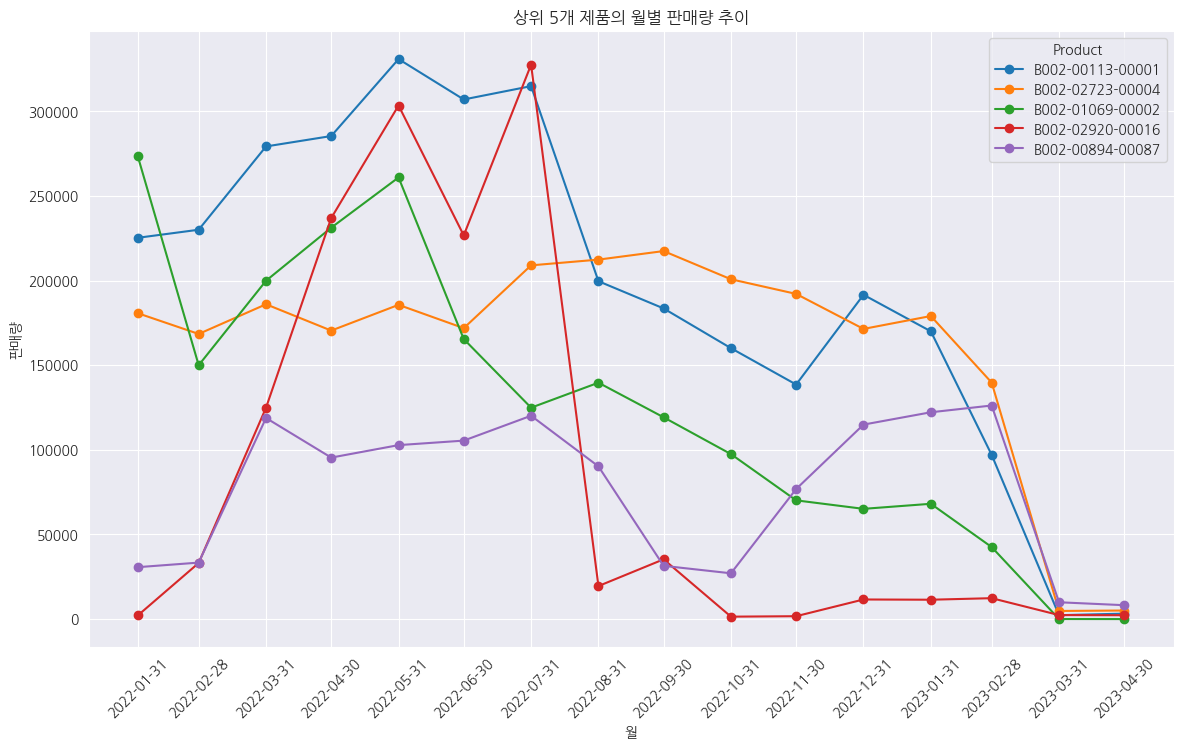

In [6]:
# 각 제품의 총 판매량 계산
product_sales = train_filtered.drop(columns=['ID', '대분류', '중분류', '소분류', '브랜드']).set_index('제품')
total_sales_per_product = product_sales.sum(axis=1)

# 총 판매량 기준 상위 5개 제품 월별 판매량 추이
top_5_products = total_sales_per_product.nlargest(5).index

top_5_sales = product_sales.loc[top_5_products].T
top_5_sales.index = pd.to_datetime(top_5_sales.index)

top_5_sales_monthly = top_5_sales.resample('ME').sum()

plt.figure(figsize=(14, 8))
for product in top_5_products:
    plt.plot(top_5_sales_monthly.index, top_5_sales_monthly[product], marker='o', label=product)

plt.xlabel('월')
plt.ylabel('판매량')
plt.title('상위 5개 제품의 월별 판매량 추이')
plt.legend(title='Product')
plt.grid(True)
plt.xticks(top_5_sales_monthly.index, rotation=45)
plt.show()

In [7]:
import pandas as pd

# 데이터 로드
train_filtered = pd.read_csv('./csv/train_filtered.csv')

# 각 제품의 총 판매량 계산
product_sales = train_filtered.drop(columns=['ID', '대분류', '중분류', '소분류', '브랜드']).set_index('제품')
total_sales_per_product = product_sales.sum(axis=1)

# 총 판매량 기준 상위 5개 제품 추출
top_5_products = total_sales_per_product.nlargest(5).index
print(top_5_products)

# 상위 5개 제품의 총 판매량 계산
top_5_sales_total = total_sales_per_product.loc[top_5_products].sum()
print(top_5_sales_total)

# 전체 판매량 계산
total_sales = total_sales_per_product.sum()
print(total_sales)

# 상위 5개 제품의 판매량이 전체 판매량에서 차지하는 비율 계산
top_5_sales_percentage = (top_5_sales_total / total_sales) * 100
print(top_5_sales_percentage)

Index(['B002-00113-00001', 'B002-02723-00004', 'B002-01069-00002',
       'B002-02920-00016', 'B002-00894-00087'],
      dtype='object', name='제품')
10288897
85483307
12.036147595459779
